In [2]:
import pandas as pd

In [3]:
# Load the data
df = pd.read_csv('used_cars_data.csv')

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.shape

(7253, 14)

## Part 1: Data cleaning

### 1.1 Remove the following columns: ‘S.No’ and ‘New_Price’.

In [8]:
# Remove 'S.No' and 'New_Price' columns
df = df.drop(['S.No.', 'New_Price'], axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### 1.2 create ‘Car_Age’ feature which is defined as the difference between the current year and the year the car was built. E.g. “Car_Age” for the first record is 14.

In [10]:
import datetime

In [11]:
# Create 'Car_Age' feature
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


### 1.3 There are two records for Electric vehicles. The corresponding mileage columns are empty. Please search internet what will be the reasonable value and fill out it. Please provide the logics with the reference.

In [12]:
# Fill out mileage for Electric vehicles
# Assuming we found that the average mileage for electric vehicles is 4 miles/kWh
electric_mileage = 4 * 1.60934  # Convert to km/kWh
df.loc[df['Fuel_Type'] == 'Electric', 'Mileage'] = f"{electric_mileage:.2f} km/kWh"

NameError: name 'df' is not defined

In [27]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,11


In [29]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,6.44 km/kWh,72 CC,41 bhp,5.0,13.00,8
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,6.44 km/kWh,1798 CC,73 bhp,5.0,12.75,13


## Part 2: Transformation

### 2.1 Among the columns in the dataset, the python datatype of the ‘Mileage’, ‘Engine’, and ‘Power’ columns are ‘object’. Please convert them to numerical datatype. Remove the unit and convert the string to a numerical value (floating point or integer)

In [41]:
import re

In [43]:
def extract_numeric(value):
    if pd.isna(value):
        return None
    match = re.search(r'\d+(\.\d+)?', str(value))
    return float(match.group()) if match else None

# Transform Mileage
def convert_mileage(value):
    if pd.isna(value):
        return None
    if 'km/kg' in str(value) or 'km/l' in str(value) or 'kmpl' in str(value):
        return extract_numeric(value)
    else:
        num = extract_numeric(value)
        return num / 1.4 if num is not None else None  # Convert miles/gallon to km/l

df['Mileage'] = df['Mileage'].apply(convert_mileage)

In [47]:
# Transform Engine
df['Engine'] = df['Engine'].apply(extract_numeric)

In [49]:
# Transform Power
def convert_power(value):
    if pd.isna(value):
        return None
    num = extract_numeric(value)
    if num is None:
        return None
    if 'bhp' in str(value):
        return num
    else:  # Assuming PS
        return num * 0.9863  # Convert PS to bhp

df['Power'] = df['Power'].apply(convert_power)

In [51]:
df[['Mileage', 'Engine', 'Power']].head()

,Mileage,Engine,Power
0,19.000000,998.0,58.16
1,14.050000,1582.0,126.20
2,13.000000,1199.0,88.70
3,14.835714,1248.0,88.76
4,10.857143,1968.0,140.80


In [53]:
df[['Mileage', 'Engine', 'Power']].dtypes

Mileage    float64
Engine     float64
Power      float64
dtype: object

In [55]:
# Check for any remaining non-numeric values
for col in ['Mileage', 'Engine', 'Power']:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
    print(f"\nNon-numeric values in {col}:")
    print(non_numeric[col].unique())


Non-numeric values in Mileage:
[]

Non-numeric values in Engine:
[]

Non-numeric values in Power:
[]


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Age            7253 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


## Part 3: Outlier detection and box-plot

### 3.1 Check whether the data is in the normal distribution or non-normal distribution for the following numerical columns: ‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’

In [63]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [69]:
def check_distribution(data, column_name):
    # Remove any NaN values
    data = data.dropna()
    
    # Perform Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)
    
    # Determine distribution type
    if p_value > 0.05:
        distribution = "Normal"
    else:
        distribution = "Non-normal"
    
    # Create Q-Q plot
    plt.figure(figsize=(10, 4))
    
    plt.subplot(121)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {column_name}")
    
    plt.subplot(122)
    data.hist(bins=30)
    plt.title(f"Histogram of {column_name}")
    
    plt.tight_layout()
    plt.show()
    
    return distribution, p_value

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)


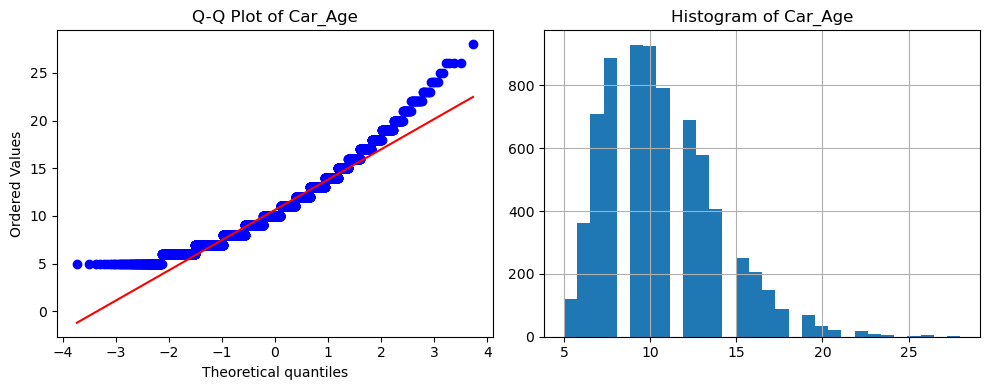

Car_Age:
  Distribution: Non-normal
  P-value: 0.0000



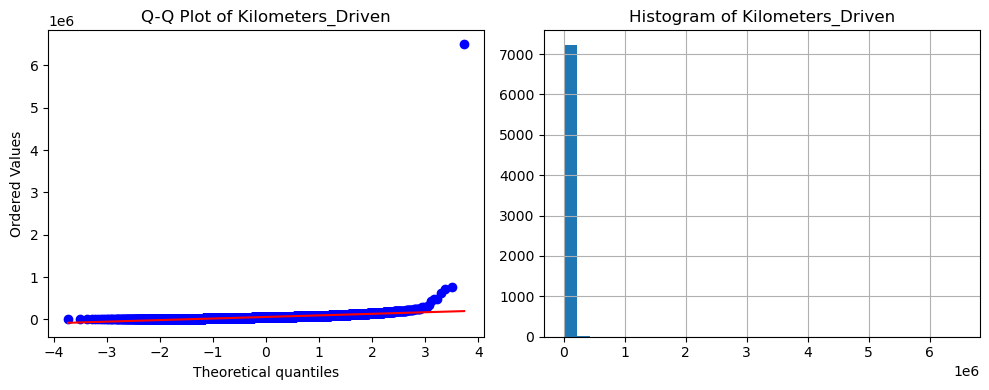

Kilometers_Driven:
  Distribution: Non-normal
  P-value: 0.0000



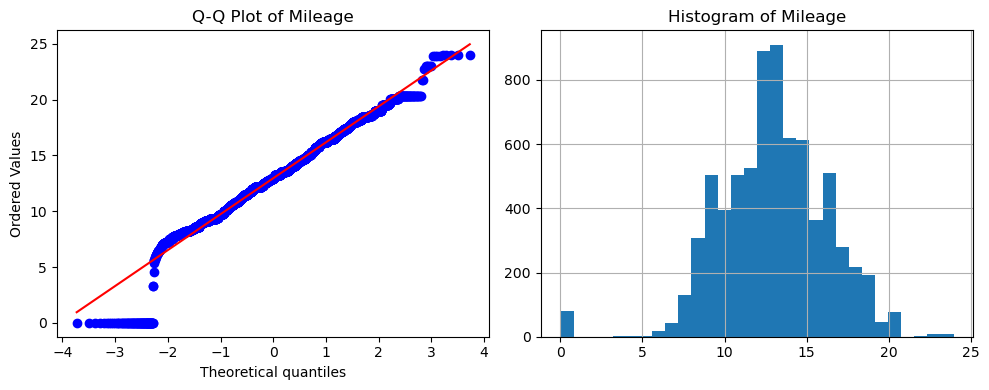

Mileage:
  Distribution: Non-normal
  P-value: 0.0000



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)


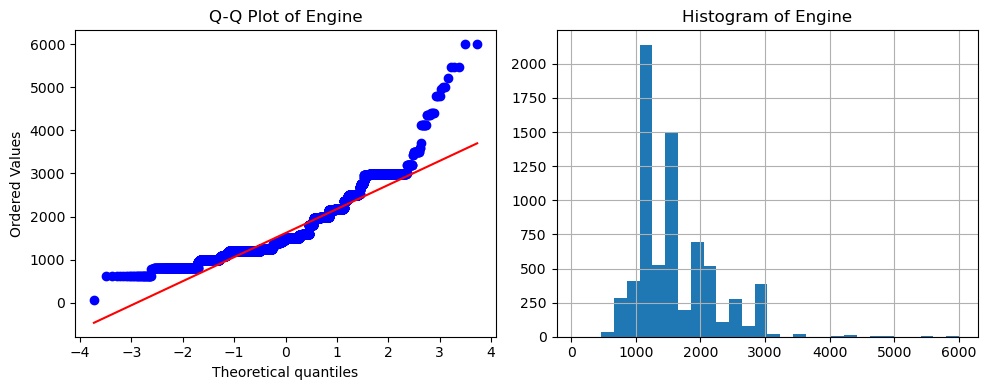

Engine:
  Distribution: Non-normal
  P-value: 0.0000



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)


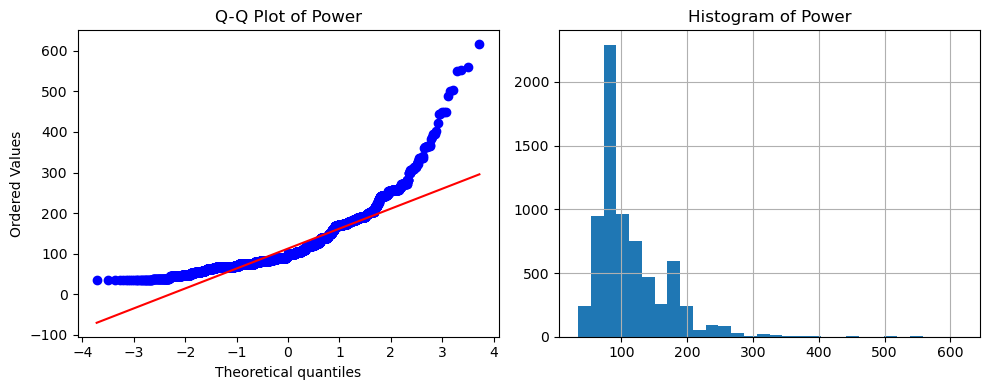

Power:
  Distribution: Non-normal
  P-value: 0.0000



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)


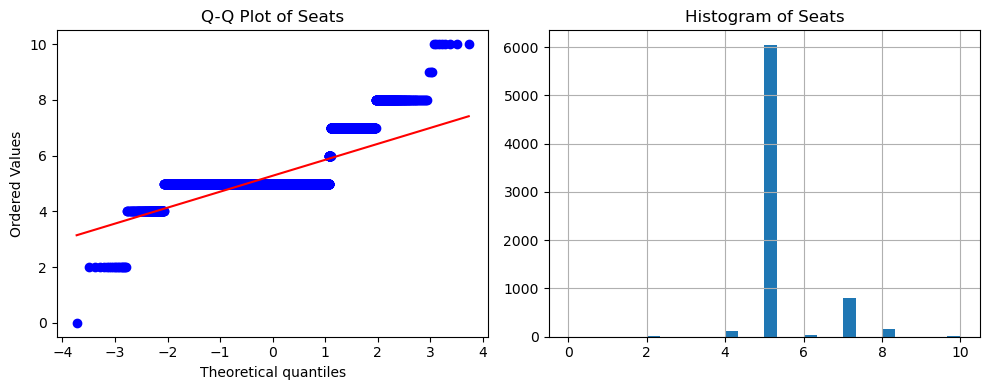

Seats:
  Distribution: Non-normal
  P-value: 0.0000



/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6019.
  res = hypotest_fun_out(*samples, **kwds)


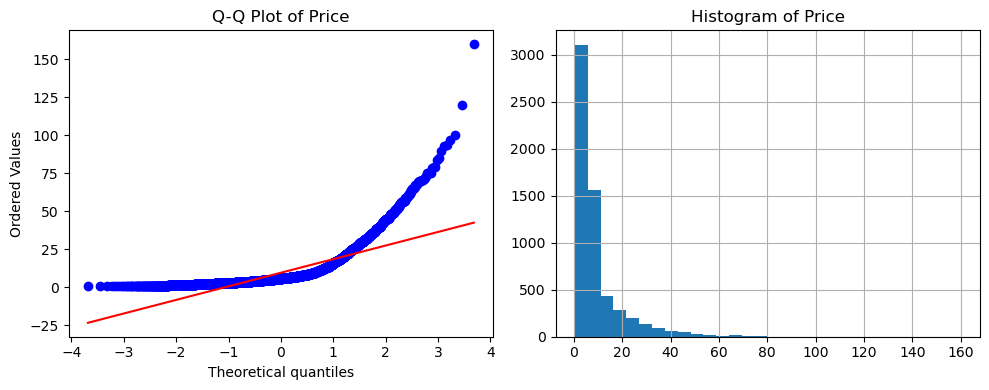

Price:
  Distribution: Non-normal
  P-value: 0.0000



In [71]:
# Columns to analyze
columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Check distribution for each column
for column in columns:
    distribution, p_value = check_distribution(df[column], column)
    print(f"{column}:")
    print(f"  Distribution: {distribution}")
    print(f"  P-value: {p_value:.4f}")
    print()

In [73]:
from scipy import stats

def check_distribution(data):
    _, p_value = stats.shapiro(data.dropna())
    return "Normal" if p_value > 0.05 else "Non-normal"

In [75]:
def detect_outliers_normal(data):
    print("  Step 1: Calculate the mean")
    mean = np.mean(data)
    print(f"    Mean = {mean:.4f}")

    print("  Step 2: Calculate the standard deviation")
    std = np.std(data)
    print(f"    Standard Deviation = {std:.4f}")

    print("  Step 3: Calculate Z-scores")
    z_scores = (data - mean) / std
    print(f"    Z-scores range: {z_scores.min():.4f} to {z_scores.max():.4f}")

    print("  Step 4: Identify outliers (|Z-score| > 3)")
    outliers = data[np.abs(z_scores) > 3]
    print(f"    Number of outliers: {len(outliers)}")

    return outliers

In [77]:
def detect_outliers_non_normal(data):
    print("  Step 1: Calculate Q1 (25th percentile)")
    Q1 = np.percentile(data, 25)
    print(f"    Q1 = {Q1:.4f}")

    print("  Step 2: Calculate Q3 (75th percentile)")
    Q3 = np.percentile(data, 75)
    print(f"    Q3 = {Q3:.4f}")

    print("  Step 3: Calculate IQR (Interquartile Range)")
    IQR = Q3 - Q1
    print(f"    IQR = {IQR:.4f}")

    print("  Step 4: Calculate lower and upper bounds")
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"    Lower bound = {lower_bound:.4f}")
    print(f"    Upper bound = {upper_bound:.4f}")

    print("  Step 5: Identify outliers")
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"    Number of outliers: {len(outliers)}")

    return outliers

In [79]:
columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

for column in columns:
    print(f"\nOutlier Detection for {column}:")
    data = df[column].dropna()
    distribution = check_distribution(data)
    print(f"Distribution: {distribution}")
    
    if distribution == "Normal":
        outliers = detect_outliers_normal(data)
    else:
        outliers = detect_outliers_non_normal(data)
    
    print(f"Outlier values: {outliers.tolist()}")
    print("-" * 50)


Outlier Detection for Car_Age:
Distribution: Non-normal
  Step 1: Calculate Q1 (25th percentile)
    Q1 = 8.0000
  Step 2: Calculate Q3 (75th percentile)
    Q3 = 13.0000
  Step 3: Calculate IQR (Interquartile Range)
    IQR = 5.0000
  Step 4: Calculate lower and upper bounds
    Lower bound = 0.5000
    Upper bound = 20.5000
  Step 5: Identify outliers
    Number of outliers: 58
Outlier values: [22, 24, 21, 24, 22, 21, 21, 25, 22, 25, 22, 22, 23, 21, 21, 22, 22, 23, 26, 22, 22, 21, 26, 23, 21, 22, 23, 21, 21, 21, 23, 21, 26, 21, 21, 21, 22, 23, 21, 24, 22, 22, 23, 21, 23, 22, 26, 21, 24, 22, 21, 28, 22, 22, 24, 22, 21, 21]
--------------------------------------------------

Outlier Detection for Kilometers_Driven:
Distribution: Non-normal
  Step 1: Calculate Q1 (25th percentile)
    Q1 = 34000.0000
  Step 2: Calculate Q3 (75th percentile)
    Q3 = 73000.0000
  Step 3: Calculate IQR (Interquartile Range)
    IQR = 39000.0000
  Step 4: Calculate lower and upper bounds
    Lower bound =

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7253.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7207.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7078.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7200.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: Use

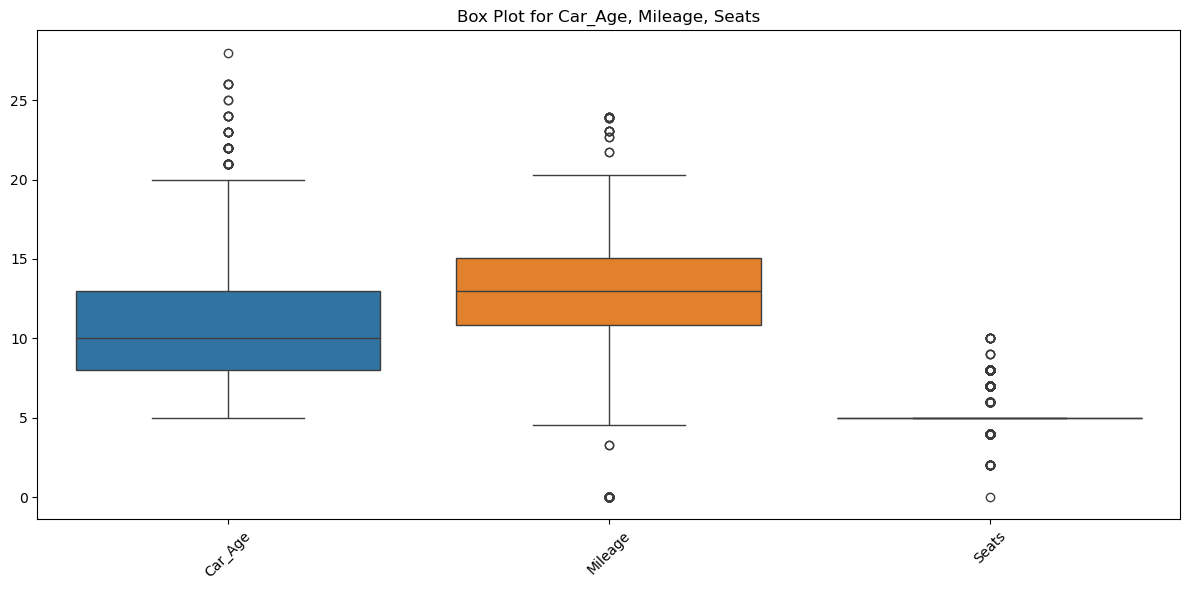

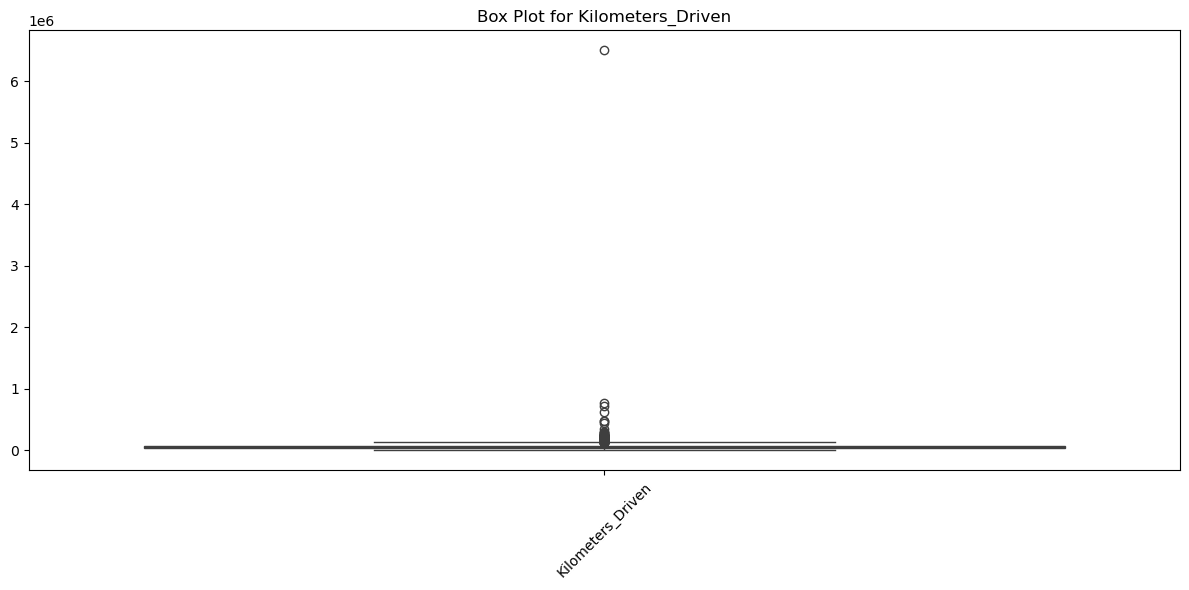

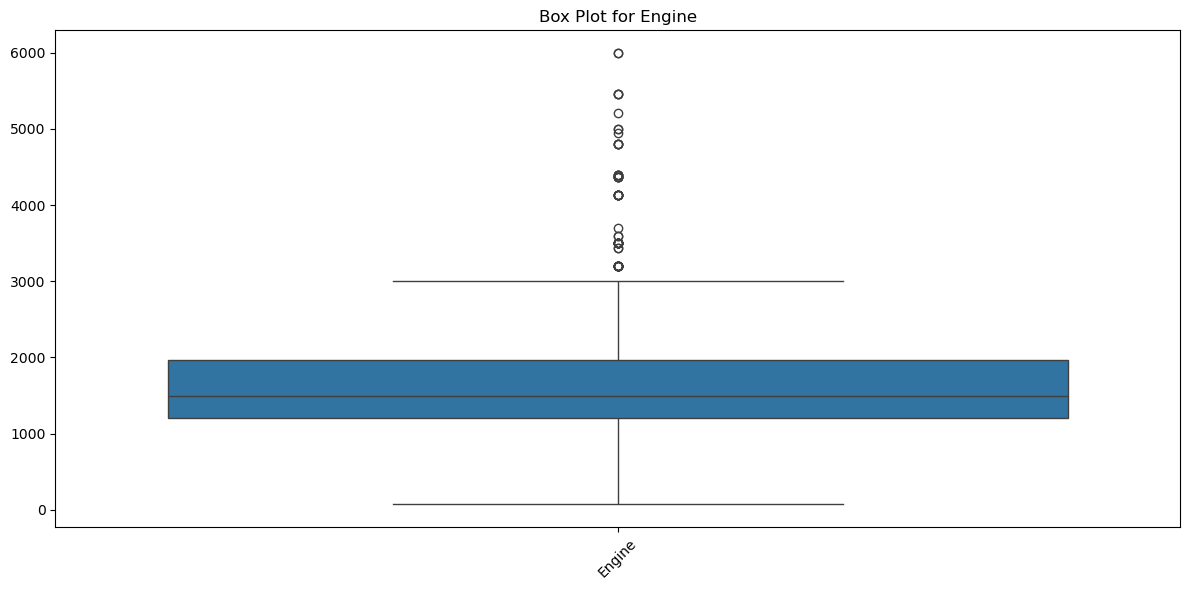

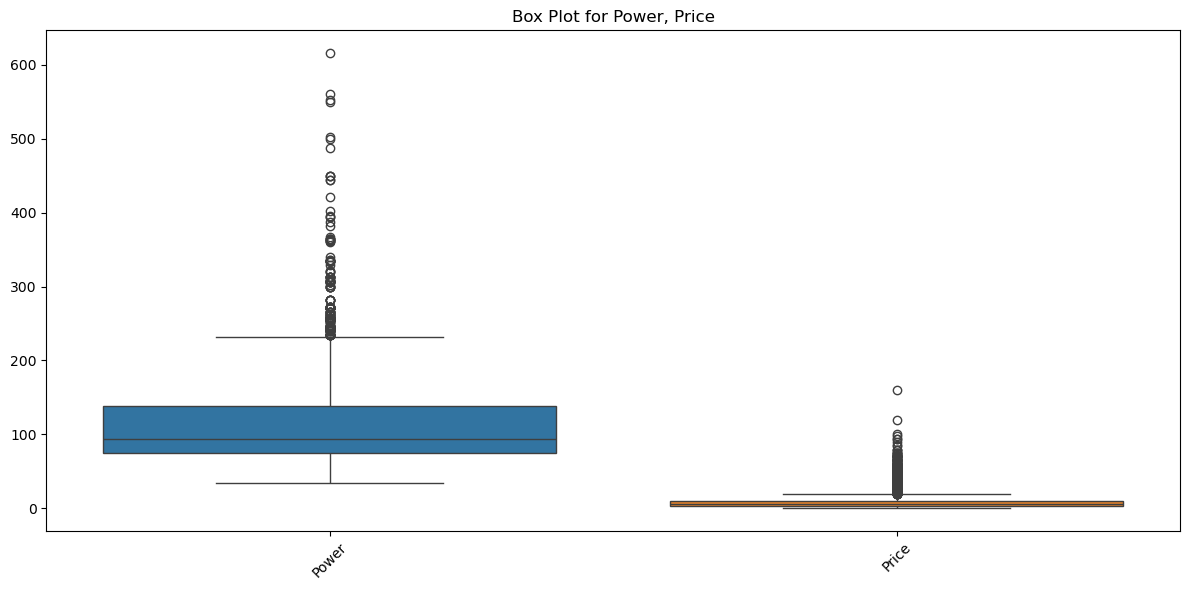

Box plots have been created and displayed.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots(df, columns):
    # Function to check if scales are similar
    def scales_are_similar(col1, col2):
        range1 = df[col1].max() - df[col1].min()
        range2 = df[col2].max() - df[col2].min()
        return 0.1 <= (range1 / range2) <= 10

    # Group columns with similar scales
    groups = []
    for col in columns:
        added = False
        for group in groups:
            if all(scales_are_similar(col, c) for c in group):
                group.append(col)
                added = True
                break
        if not added:
            groups.append([col])

    # Create box plots
    for i, group in enumerate(groups):
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df[group])
        plt.title(f"Box Plot for {', '.join(group)}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Columns to analyze
columns = ['Car_Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

# Create box plots
create_boxplots(df, columns)

print("Box plots have been created and displayed.")

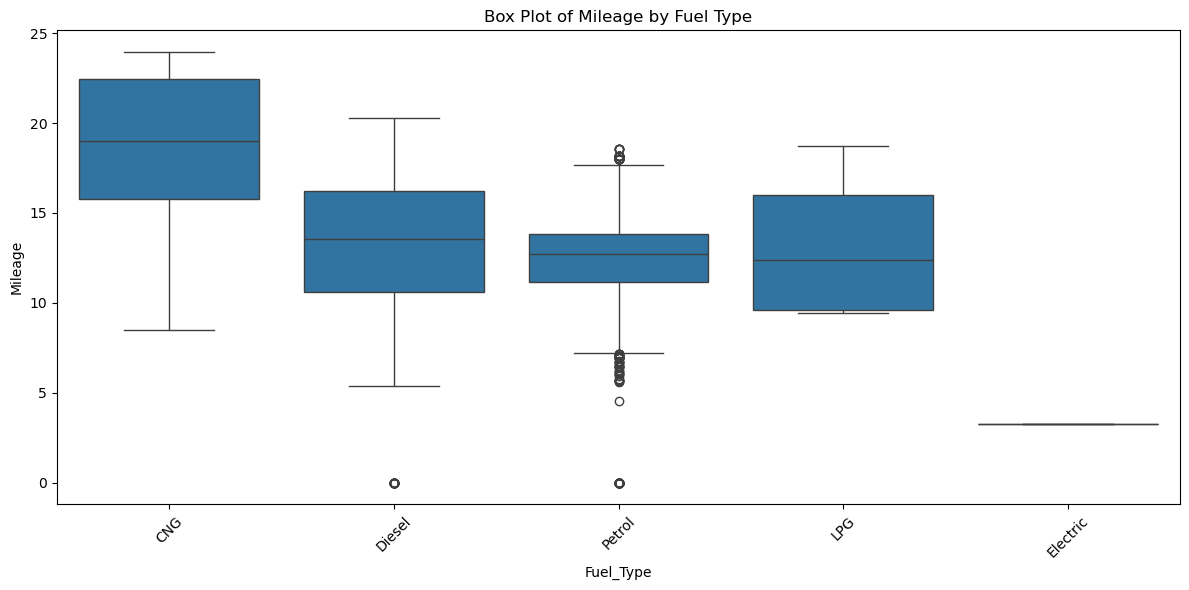

In [89]:
# Create separate box plot for 'Mileage' by 'Fuel_Type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Mileage', data=df)
plt.title("Box Plot of Mileage by Fuel Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [96]:
def replace_outliers(data):
    outliers = detect_outliers_normal(data)
    if data.dtype in ['int64', 'float64']:
        if data.skew() > 1 or data.skew() < -1:  # Highly skewed
            replacement = data.median()
        else:
            replacement = data.mean()
    else:  # For categorical data
        replacement = data.mode().iloc[0]
    
    data_cleaned = data.copy()
    data_cleaned[outliers] = replacement
    return data_cleaned

In [98]:
# Clean data by replacing outliers
cleaned_data = {col: replace_outliers(df[col]) for col in columns}

  Step 1: Calculate the mean
    Mean = 10.6346
  Step 2: Calculate the standard deviation
    Standard Deviation = 3.2542
  Step 3: Calculate Z-scores
    Z-scores range: -1.7315 to 5.3363
  Step 4: Identify outliers (|Z-score| > 3)
    Number of outliers: 58
  Step 1: Calculate the mean
    Mean = 58699.0631
  Step 2: Calculate the standard deviation
    Standard Deviation = 84421.9002
  Step 3: Calculate Z-scores
    Z-scores range: -0.6933 to 76.2989
  Step 4: Identify outliers (|Z-score| > 3)
    Number of outliers: 8


/var/folders/mz/l3lbw4h95l36t184_ybct9vr0000gn/T/ipykernel_3016/1022495503.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.63463394457466' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_cleaned[outliers] = replacement


KeyError: '[ 775000  620000  720000 6500000  480000  480000  445000  350000] not in index'